<a href="https://colab.research.google.com/github/EsraCesur4/MusicEmotionRecognition/blob/main/Music_Emotion_Recognition_with_RFC_%26_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Music Emotion Recognition for the kaggle competition: https://www.kaggle.com/competitions/kcl-artificial-intelligence-competition-22-23

In [ ]:
import pandas as pd
import numpy as np
import torch

# Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Ezeysay16/veridosyalari/main/train_set.csv")
df.head()

,id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,realease_year,emotion_tag
0,1000,Breakeven,The Script,0.630,0.694,10,-4.501,1,0.0242,0.144,0.000000,0.0835,0.490,94.034,261427,4,2008,chill
1,1001,Why Suffer??,Carlos Truly,0.593,0.458,0,-9.108,1,0.0774,0.495,0.059500,0.0878,0.731,168.082,200102,4,2022,NaN
2,1002,Out Here On My Own,Various Artists,0.411,0.129,7,-15.070,1,0.0358,0.980,0.000025,0.0850,0.222,136.215,193360,4,1980,NaN
3,1003,home (feat. Kehina),ones,0.771,0.361,0,-15.171,0,0.0517,0.670,0.826000,0.1080,0.259,105.992,173615,4,2022,NaN
4,1004,Way down We Go,KALEO,0.489,0.505,10,-8.022,0,0.1170,0.579,0.000333,0.1040,0.337,163.255,213707,4,2016,NaN


In [ ]:
from sklearn import preprocessing
loudness = df[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
df['loudness'] = pd.DataFrame(loudness_scaled)

In [ ]:
labelled = df[df["emotion_tag"].notnull()]
labelled.head()

,id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,realease_year,emotion_tag
0,1000,Breakeven,The Script,0.630,0.694,10,0.822158,1,0.0242,0.144000,0.000000,0.0835,0.490,94.034,261427,4,2008,chill
8,1008,Stressed Out,Twenty One Pilots,0.734,0.637,4,0.786315,0,0.1410,0.046200,0.000023,0.0602,0.648,169.977,202333,4,2015,sad
12,1012,The One That Got Away,Katy Perry,0.687,0.792,1,0.836727,0,0.0353,0.000802,0.000000,0.2000,0.864,133.962,227333,4,2012,happy
18,1018,Armed & Dangerous,King Von,0.696,0.592,1,0.767906,1,0.3190,0.152000,0.000000,0.1270,0.232,188.051,122680,4,2020,angry
19,1019,Recovery,Justin Bieber,0.509,0.522,6,0.817678,0,0.1890,0.013000,0.000000,0.3290,0.229,132.087,182373,4,2014,chill


In [ ]:
unlabelled = df[df["emotion_tag"].isnull()]
unlabelled.head()

,id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,realease_year,emotion_tag
1,1001,Why Suffer??,Carlos Truly,0.593,0.458,0,0.681743,1,0.0774,0.4950,0.059500,0.0878,0.731,168.082,200102,4,2022,NaN
2,1002,Out Here On My Own,Various Artists,0.411,0.129,7,0.500030,1,0.0358,0.9800,0.000025,0.0850,0.222,136.215,193360,4,1980,NaN
3,1003,home (feat. Kehina),ones,0.771,0.361,0,0.496952,0,0.0517,0.6700,0.826000,0.1080,0.259,105.992,173615,4,2022,NaN
4,1004,Way down We Go,KALEO,0.489,0.505,10,0.714843,0,0.1170,0.5790,0.000333,0.1040,0.337,163.255,213707,4,2016,NaN
5,1005,something special,joan,0.769,0.718,9,0.836239,1,0.0619,0.0656,0.000000,0.2650,0.757,92.969,157097,4,2021,NaN


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(labelled['emotion_tag'])

# printing label
label

labelled.drop("emotion_tag", axis=1, inplace=True)

# Appending the array to our dataFrame
# with column name 'Purchased'
labelled["emotion_tag"] = label

# printing Dataframe
labelled

<ipython-input-6-043c6d2e1a2d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled.drop("emotion_tag", axis=1, inplace=True)
<ipython-input-6-043c6d2e1a2d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labelled["emotion_tag"] = label


,id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,realease_year,emotion_tag
0,1000,Breakeven,The Script,0.630,0.694,10,0.822158,1,0.0242,0.144000,0.000000,0.0835,0.490,94.034,261427,4,2008,1
8,1008,Stressed Out,Twenty One Pilots,0.734,0.637,4,0.786315,0,0.1410,0.046200,0.000023,0.0602,0.648,169.977,202333,4,2015,3
12,1012,The One That Got Away,Katy Perry,0.687,0.792,1,0.836727,0,0.0353,0.000802,0.000000,0.2000,0.864,133.962,227333,4,2012,2
18,1018,Armed & Dangerous,King Von,0.696,0.592,1,0.767906,1,0.3190,0.152000,0.000000,0.1270,0.232,188.051,122680,4,2020,0
19,1019,Recovery,Justin Bieber,0.509,0.522,6,0.817678,0,0.1890,0.013000,0.000000,0.3290,0.229,132.087,182373,4,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,3781,Midnight Vibes,RC Jay,0.656,0.271,9,0.582536,0,0.1520,0.497000,0.890000,0.1100,0.354,180.055,130833,4,2022,1
2782,3782,nightcap,Ragz Originale,0.712,0.672,1,0.759159,1,0.1650,0.641000,0.000023,0.1120,0.422,127.016,125280,4,2021,1
2784,3784,Broke Boy,Malia Civetz,0.794,0.686,8,0.850655,1,0.2050,0.086500,0.000000,0.0656,0.759,98.050,173933,4,2020,2
2788,3788,"You Think I Ain't Worth A Dollar, But I Feel L...",Queens of the Stone Age,0.507,0.860,0,0.752545,0,0.1150,0.019900,0.038700,0.2510,0.557,79.793,192493,4,2002,0


In [ ]:
test = pd.read_csv("https://raw.githubusercontent.com/Ezeysay16/veridosyalari/main/test_set_no_labels.csv")
test.head()

,id,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,realease_year,emotion_tag
0,1,My Way,Limp Bizkit,0.576,0.864,6,-3.981,1,0.0462,0.02000,0.000002,0.6830,0.609,97.225,272973,4,2000,NaN
1,2,Symphony (feat. Zara Larsson),Clean Bandit,0.715,0.605,0,-5.128,0,0.0428,0.23900,0.000014,0.1890,0.454,122.956,212733,4,2018,NaN
2,3,concert for aliens,Machine Gun Kelly,0.507,0.951,11,-2.999,1,0.0586,0.00032,0.000000,0.3300,0.692,95.016,160222,4,2020,NaN
3,4,Everlong,Foo Fighters,0.413,0.881,11,-5.541,0,0.0367,0.00006,0.000308,0.0805,0.364,158.066,250547,4,1997,NaN
4,5,WITHOUT YOU,The Kid LAROI,0.662,0.413,0,-7.357,1,0.0299,0.21300,0.000000,0.1340,0.467,93.005,161385,4,2020,NaN


# Random Forest

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, f1_score

In [ ]:
rfc = RandomForestClassifier(n_estimators=50,criterion='gini')
x_data = labelled[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness',"liveness", 'valence', "tempo"]]
y_data = labelled['emotion_tag']
rfc.fit(x_data, y_data)

features = x_data.columns
list(zip(x_data[features], rfc.feature_importances_))

[('danceability', 0.12421644126671612),
 ('energy', 0.1379379779853194),
 ('loudness', 0.11359753805495729),
 ('speechiness', 0.11694207639320187),
 ('acousticness', 0.13278945580314824),
 ('instrumentalness', 0.10816600624912333),
 ('liveness', 0.06653283110997422),
 ('valence', 0.1189146504301578),
 ('tempo', 0.0809030227074017)]

In [ ]:
# Split the labeled data into features and labels
y_labeled = labelled['emotion_tag']
X_labeled = labelled[['danceability', 'energy',  'speechiness', 'acousticness',
       'instrumentalness', 'valence']]
X_unlabeled = unlabelled[['danceability', 'energy', 'speechiness', 'acousticness',
       'instrumentalness', 'valence']]

## RFC ile Self Training

In [ ]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_unlabeled0 = scaler.fit_transform(X_unlabeled)
X_labeled0 = scaler.transform(X_labeled)

label_encoder = LabelEncoder()

# Fit the label encoder on the target variable and transform both training and test labels
y_labeled0 = label_encoder.fit_transform(y_labeled)

num_classes = 4
params = {
    'n_estimators': 50,
    'random_state': 42,
    'criterion' :'gini'
}

rf_classifier = RandomForestClassifier(**params)
rf_classifier.fit(X_labeled0, y_labeled0)

proba_unlabeled = rf_classifier.predict_proba(X_unlabeled0)

# Set a threshold for pseudo-labeling
threshold = 0.5

pseudo_labels0 = np.argmax(proba_unlabeled, axis=1)  # Get the class indices with highest probabilities
pseudo_labels_confidence = np.max(proba_unlabeled, axis=1)  # Get the highest probabilities
pseudo_labeled_indices = np.where(pseudo_labels_confidence >= threshold)[0]  # Get indices above the threshold
X_pseudo_labeled = X_unlabeled0[pseudo_labeled_indices]
y_pseudo_labeled = pseudo_labels0[pseudo_labeled_indices]

# Combine the labeled and pseudo-labeled data
X_combined = np.concatenate((X_labeled, X_pseudo_labeled), axis=0)
y_combined = np.concatenate((y_labeled, y_pseudo_labeled), axis=0)

In [ ]:
y_pseudo_labeled.size/pseudo_labels0.size

0.8058035714285714

In [ ]:
psd_lbl = np.array(pseudo_labels0)
psd_unique, psd_count = np.unique(psd_lbl, return_counts = True)
print(psd_unique, psd_count)

[0 1 2 3] [569 524 530 617]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

label_encoder = LabelEncoder()

# Fit the label encoder on the target variable and transform both training and test labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

rf_classifier.fit(X_train, y_train)
test_predictions = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, test_predictions)
print("Acurracy: ", accuracy)

# Recall değerini hesaplama
recall_micro = recall_score(y_test, test_predictions, average='micro')
recall_macro = recall_score(y_test, test_predictions, average='macro')
recall_weighted = recall_score(y_test, test_predictions, average='weighted')
recall_none = recall_score(y_test, test_predictions, average=None)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Class-wise Recall:", recall_none)

# Precision değerini hesaplama
precision_micro = precision_score(y_test, test_predictions, average='micro')
precision_macro = precision_score(y_test, test_predictions, average='macro')
precision_weighted = precision_score(y_test, test_predictions, average='weighted')
precision_none = precision_score(y_test, test_predictions, average=None)

print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Class-wise Precision:", precision_none)

# F1-score değerini hesaplama
f1_micro = f1_score(y_test, test_predictions, average='micro')
f1_macro = f1_score(y_test, test_predictions, average='macro')
f1_weighted = f1_score(y_test, test_predictions, average='weighted')
f1_none = f1_score(y_test, test_predictions, average=None)

print("Micro F1-score:", f1_micro)
print("Macro F1-score:", f1_macro)
print("Weighted F1-score:", f1_weighted)
print("Class-wise F1-score:", f1_none)


Acurracy:  0.8271889400921659
Micro Recall: 0.8271889400921659
Macro Recall: 0.8265016516843275
Weighted Recall: 0.8271889400921659
Class-wise Recall: [0.92553191 0.81451613 0.72043011 0.84552846]
Micro Precision: 0.8271889400921659
Macro Precision: 0.8364065351619285
Weighted Precision: 0.8465470607462834
Class-wise Precision: [0.66412214 0.91818182 0.85897436 0.90434783]
Micro F1-score: 0.8271889400921659
Macro F1-score: 0.8235391268518203
Weighted F1-score: 0.8297443771379084
Class-wise F1-score: [0.77333333 0.86324786 0.78362573 0.87394958]


In [ ]:
x =

In [ ]:
test_lbl = np.array(test_predictions)
test_unique, test_count = np.unique(test_lbl, return_counts = True)
print(test_unique, test_count)

[0 1 2 3] [131 110  78 115]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,test_predictions))

              precision    recall  f1-score   support

           0       0.66      0.93      0.77        94
           1       0.92      0.81      0.86       124
           2       0.86      0.72      0.78        93
           3       0.90      0.85      0.87       123

    accuracy                           0.83       434
   macro avg       0.84      0.83      0.82       434
weighted avg       0.85      0.83      0.83       434



# XGBoost

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_unlabeled2 = scaler.fit_transform(X_unlabeled)
X_labeled2 = scaler.transform(X_labeled)

label_encoder = LabelEncoder()

y_labeled2 = label_encoder.fit_transform(y_labeled)

In [ ]:
import xgboost as xgb

num_classes = 4
params = {
    'objective': 'multi:softmax',
    'num_class': num_classes,
    'max_depth': 3,
    'eta': 0.1,
    'n_estimators': 100
}

model = xgb.XGBClassifier(**params)
model.fit(X_labeled2, y_labeled2)

proba_unlabeled = model.predict_proba(X_unlabeled2)

threshold = 0.5

# Perform pseudo-labeling on the unlabeled data based on the threshold
pseudo_labels2 = np.argmax(proba_unlabeled, axis=1)  # Get the class indices with highest probabilities
pseudo_labels_confidence = np.max(proba_unlabeled, axis=1)  # Get the highest probabilities
pseudo_labeled_indices = np.where(pseudo_labels_confidence >= threshold)[0]  # Get indices above the threshold
X_pseudo_labeled2 = X_unlabeled2[pseudo_labeled_indices]
y_pseudo_labeled = pseudo_labels2[pseudo_labeled_indices]

X_combined2 = np.concatenate((X_labeled2, X_pseudo_labeled2), axis=0)
y_combined2 = np.concatenate((y_labeled2, y_pseudo_labeled), axis=0)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_combined2, y_combined2, test_size=0.2, random_state=42)

model.fit(X_train1, y_train1)
test_predictions2 = model.predict(X_test1)

accuracy = accuracy_score(y_test1, test_predictions2)
print("Accuracy:", accuracy)

# Recall değerini hesaplama
recall_micro = recall_score(y_test1, test_predictions2, average='micro')
recall_macro = recall_score(y_test1, test_predictions2, average='macro')
recall_weighted = recall_score(y_test1, test_predictions2, average='weighted')
recall_none = recall_score(y_test1, test_predictions2, average=None)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Weighted Recall:", recall_weighted)
print("Class-wise Recall:", recall_none)

# Precision değerini hesaplama
precision_micro = precision_score(y_test1, test_predictions2, average='micro')
precision_macro = precision_score(y_test1, test_predictions2, average='macro')
precision_weighted = precision_score(y_test1, test_predictions2, average='weighted')
precision_none = precision_score(y_test1, test_predictions2, average=None)

print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Weighted Precision:", precision_weighted)
print("Class-wise Precision:", precision_none)

# F1-score değerini hesaplama
f1_micro = f1_score(y_test1, test_predictions2, average='micro')
f1_macro = f1_score(y_test1, test_predictions2, average='macro')
f1_weighted = f1_score(y_test1, test_predictions2, average='weighted')
f1_none = f1_score(y_test1, test_predictions2, average=None)

print("Micro F1-score:", f1_micro)
print("Macro F1-score:", f1_macro)
print("Weighted F1-score:", f1_weighted)
print("Class-wise F1-score:", f1_none)


Accuracy: 0.8985200845665962
Micro Recall: 0.8985200845665962
Macro Recall: 0.8996454055750458
Weighted Recall: 0.8985200845665962
Class-wise Recall: [0.89565217 0.86178862 0.93069307 0.91044776]
Micro Precision: 0.8985200845665962
Macro Precision: 0.8993376643621475
Weighted Precision: 0.9002941554330087
Class-wise Precision: [0.94495413 0.9137931  0.85454545 0.88405797]
Micro F1-score: 0.8985200845665962
Macro F1-score: 0.8986815575096762
Weighted F1-score: 0.8986467965366685
Class-wise F1-score: [0.91964286 0.88702929 0.89099526 0.89705882]


# 2 Modelin Karşılaştırılması

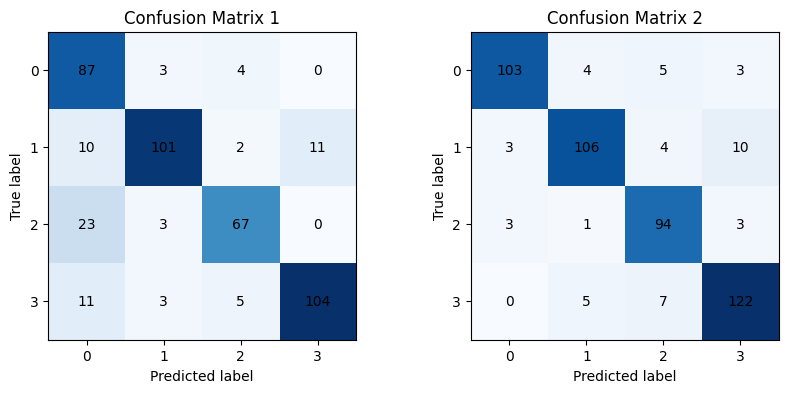

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_matrix_model1 = confusion_matrix(y_test, test_predictions)
confusion_matrix_model2 = confusion_matrix(y_test1, test_predictions2)

labels = np.unique(y_test)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].imshow(confusion_matrix_model1, interpolation='nearest', cmap='Blues')
axes[0].set_xticks(np.arange(len(np.unique(y_test))))
axes[0].set_yticks(np.arange(len(np.unique(y_test))))
axes[0].set_xticklabels(np.unique(y_test))
axes[0].set_yticklabels(np.unique(y_test))
axes[0].set_title('Confusion Matrix 1')
axes[0].set_xlabel('Predicted label')
axes[0].set_ylabel('True label')

# Plot the second confusion matrix
axes[1].imshow(confusion_matrix_model2, interpolation='nearest', cmap='Blues')
axes[1].set_xticks(np.arange(len(np.unique(y_test1))))
axes[1].set_yticks(np.arange(len(np.unique(y_test1))))
axes[1].set_xticklabels(np.unique(y_test1))
axes[1].set_yticklabels(np.unique(y_test1))
axes[1].set_title('Confusion Matrix 2')
axes[1].set_xlabel('Predicted label')
axes[1].set_ylabel('True label')

for i in range(len(labels)):
    for j in range(len(labels)):
        text = axes[0].text(j, i, confusion_matrix_model1[i, j], ha='center', va='center', color='black')

for i in range(len(labels)):
    for j in range(len(labels)):
        text = axes[1].text(j, i, confusion_matrix_model2[i, j], ha='center', va='center', color='black')

##### 4 adet sınıfımız var,
##### Sınıf 0 -> angry
##### Sınıf 1 -> chill
##### Sınıf 2 -> happy
##### Sınıf 3 -> sad
#####Sınıf 0 için doğru şekilde tahmin edilen (gerçek pozitif) 120 örnek,
#####Sınıf 0 olarak yanlış şekilde tahmin edilen (yalancı pozitif) 5 örnek,
#####Sınıf 0 olarak yanlış şekilde tahmin edilen (yalancı negatif) 10 örnek,
#####Sınıf 0 olarak yanlış şekilde tahmin edilen (yalancı negatif) 4 örnek vardır.

In [ ]:
test_lbl = np.array(test_predictions2)
test_unique, test_count = np.unique(test_lbl, return_counts = True)
print(test_unique, test_count)

[0 1 2 3] [109 116 110 138]


In [ ]:
test_lbl

array([3, 0, 3, 0, 3, 0, 1, 3, 0, 2, 1, 1, 1, 3, 0, 0, 0, 1, 3, 2, 2, 2,
       3, 3, 1, 2, 1, 3, 2, 0, 3, 0, 3, 1, 1, 3, 3, 2, 1, 1, 3, 2, 0, 2,
       1, 2, 3, 3, 0, 3, 0, 3, 3, 3, 1, 3, 2, 1, 3, 3, 3, 1, 3, 1, 2, 3,
       1, 3, 1, 3, 2, 2, 2, 0, 3, 2, 1, 3, 2, 0, 2, 1, 3, 0, 1, 0, 0, 2,
       1, 0, 2, 1, 0, 1, 2, 3, 0, 1, 3, 1, 3, 2, 1, 2, 2, 0, 0, 2, 0, 0,
       0, 2, 2, 1, 1, 3, 3, 1, 3, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 2, 1,
       1, 3, 2, 2, 0, 1, 3, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       3, 3, 3, 0, 1, 0, 3, 0, 1, 1, 1, 3, 2, 1, 0, 0, 3, 3, 2, 2, 0, 2,
       1, 2, 1, 3, 3, 1, 2, 3, 3, 1, 1, 0, 3, 2, 2, 2, 2, 2, 2, 3, 3, 1,
       1, 2, 0, 2, 3, 1, 1, 1, 3, 0, 3, 3, 2, 3, 0, 0, 2, 3, 1, 1, 0, 0,
       1, 1, 3, 1, 2, 1, 0, 0, 1, 3, 1, 0, 0, 1, 3, 1, 0, 1, 3, 3, 3, 0,
       0, 3, 0, 0, 0, 1, 0, 3, 2, 3, 1, 0, 2, 3, 3, 1, 1, 0, 1, 2, 2, 0,
       1, 3, 1, 1, 1, 3, 2, 0, 0, 0, 0, 0, 2, 3, 1, 3, 3, 3, 3, 3, 1, 2,
       2, 2, 0, 1, 2, 3, 1, 2, 1, 1, 2, 3, 0, 3, 3,

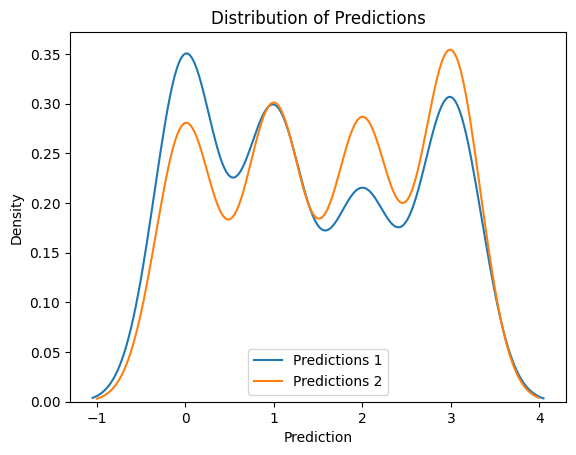

In [ ]:
import seaborn as sns

sns.kdeplot(test_predictions, label='Predictions 1')
sns.kdeplot(test_predictions2, label='Predictions 2')
plt.xlabel('Prediction')
plt.ylabel('Density')
plt.title('Distribution of Predictions')
plt.legend()
plt.show()

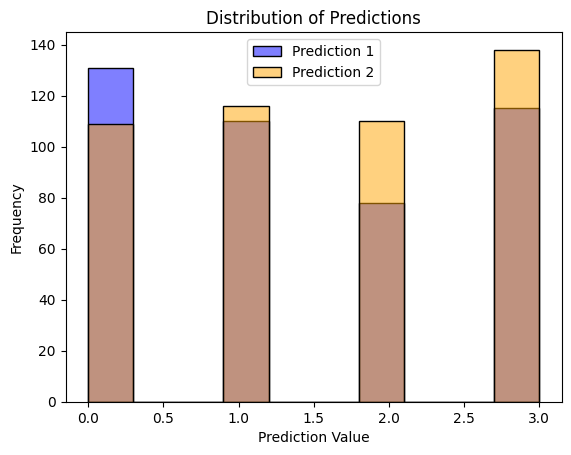

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming pred1 and pred2 are the two sets of prediction values

sns.histplot(test_predictions, label='Prediction 1', color='blue', alpha=0.5)
sns.histplot(test_predictions2, label='Prediction 2', color='orange', alpha=0.5)

plt.xlabel('Prediction Value')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions')
plt.legend()
plt.show()

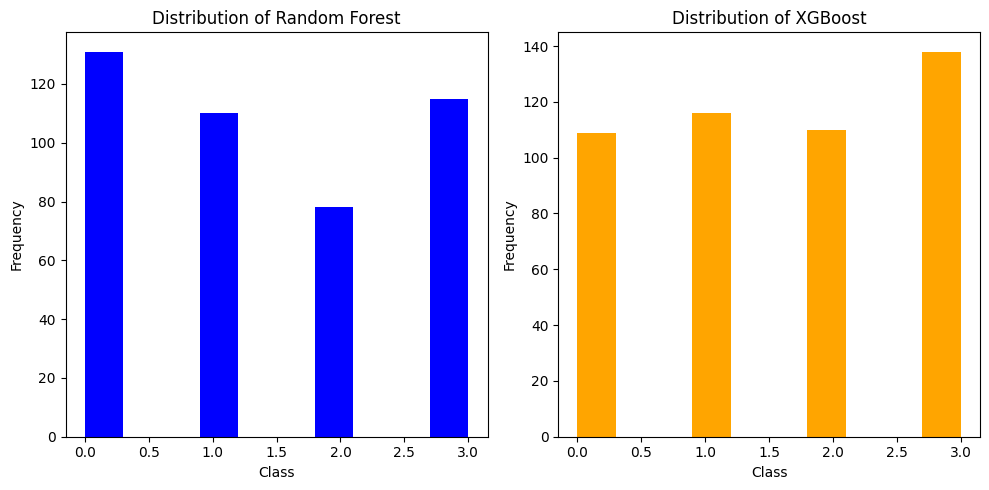

In [ ]:
import matplotlib.pyplot as plt

# Assuming pred1 and pred2 are the two sets of prediction values

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(test_predictions, color='blue')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Distribution of Random Forest')

axs[1].hist(test_predictions2, color='orange')
axs[1].set_xlabel('Class')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Distribution of XGBoost')

plt.tight_layout()
plt.show()